# Algorithmn Re-Assesment

**Introduction:**
Using the data gathered from Taarifa and the Tanzanian Ministry of Water, can we predict which pumps are functional, which need some repairs, and which don't work at all? Predicting one of these three classes based and a smart understanding of which waterpoints will fail, can improve the maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

This is also an intermediate-level competition by [DataDriven][1]! All code & support scripts are in [Github Repo][2]

[1]: https://www.drivendata.org/competitions/7/ "Link to Competetion Page"
[2]: https://github.com/msampathkumar/datadriven_pumpit "User Code"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from scripts.tools import df_check_stats, game, sam_pickle_save, sam_pickle_load

np.set_printoptions(precision=5)
np.random.seed(69572)
plt.style.use('ggplot')
sns.set(color_codes=True)

crazy_list = dir()

%matplotlib inline

In [2]:
for each in dir():
    if each not in crazy_list:
        del each

print('Length of dir():', len(dir()))

Length of dir(): 42


Inspired by the [Classifier comparision from SciKit Example](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html), we are trying to see which algorithm work better.

Due to heavyness of data, we are avoiding checking Linear, RBF, SVM

In [3]:
X, y, TEST_X = sam_pickle_load(prefix="tmp/Iteration2_vt_kb_")
df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration2_vt_kb_
Data Frame Shape: (59400, 19) TotColumns: 19 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 19) TotColumns: 19 ObjectCols: 0


In [4]:
clf = RandomForestClassifier(random_state=192)

scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)

print('AC Score:', scores.mean())

AC Score: 0.79575754284


In [5]:
# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.25, random_state=42)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


names = ["Nearest Neighbors",
#          "Linear SVM",
#          "RBF SVM",
#          "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "GBT",]

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier()]

# iterate over classifiers
te_scores = []
tr_scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    tr_scores.append(clf.score(X_train, y_train))
    te_scores.append(clf.score(X_test, y_test))

/Users/sampathm/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


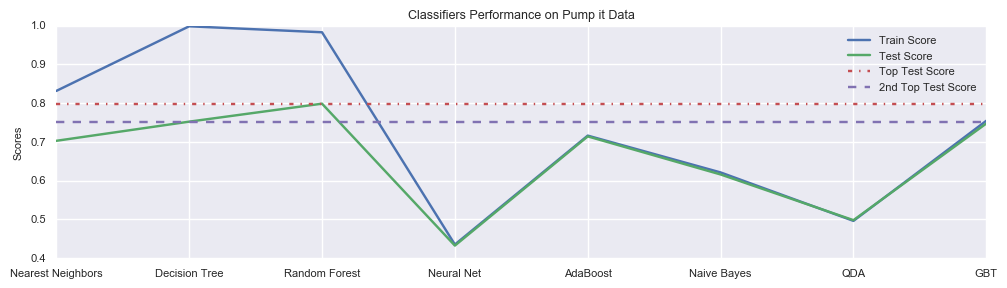

In [7]:
plt.figure(figsize=(12, 3))
plt.plot(range(len(names)), tr_scores)
plt.plot(range(len(names)), te_scores)
plt.xticks(range(len(names)), names, fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Scores', fontsize=8)
# plt.xlabel('Alog', fontsize=8)

plt.title('Classifiers Performance on Pump it Data', fontsize=9)

lines_scores = te_scores.copy()
lines_scores.sort()

plt.plot((0, len(tr_scores) -1 ), (lines_scores[-1], lines_scores[-1]), '-.')
plt.plot((0, len(tr_scores) -1 ), (lines_scores[-2], lines_scores[-2]), '--')


plt.legend(['Train Score',
            'Test Score',
            'Top Test Score',
            '2nd Top Test Score'], fontsize=8)

In [8]:
te_scores

[0.70303030303030301,
 0.75245791245791249,
 0.79885521885521882,
 0.43259259259259258,
 0.71441077441077439,
 0.61616161616161613,
 0.49824915824915827,
 0.74767676767676772]

__Conclusion:__

As you can see from above plots, complete first half set of these algorithms(KNN, DT, RF) suffer overfitting/bias issues. In Neural Nets, AdaBoost, Naive Bayes, QDA and GBT seems to have performed well with very minimal differences in their test-train scores.

Overall GBT Tress, which was one of our expected models seems to topped in the list of Classifier. Although Random Forest and Decision Trees have higest train scores and RF has top mest test scores, due to their test-train scores these, in this dataset have failed to provide a generic data model.